In [5]:
import numpy as np
from math import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Эксперимент

## Определение входных данных

Масса тела $m$; \\
Расстояние от оси вращения до центра масс $l$; \\
Момент инерции $I$ тела; \\
Ускорение свободного падения $g = 9.82 м/с^2$; \\
Коэффициент лобового сопротивления $r$; \\

Начальный угол отклонения $\varphi_0$; \\
Угол застоя $\Delta \varphi_з$; \\

In [80]:
def run(m, l, I, phi_0, delta_t=0.05, g=9.82, r=0, delta_phi=0):
  # Постоянные
  beta = r*(l**2)/(2*I)
  w_0_squared = m*g*l/I
  sin_delta_phi = sin(delta_phi)

  print(f"beta: {beta} \nw_0 в квадрате: {w_0_squared} \nsin(delta_phi): {sin_delta_phi}")

  # Функции
  f = lambda W: W;
  psi = lambda Phi, W: -2*beta*W - w_0_squared*sin(Phi) + w_0_squared*sin_delta_phi


  # Начальные данные
  t = 0
  phi = phi_0
  w = 0
  A = l*sin(phi)


  # Таблицы для хранения данных
  phi_t = pd.DataFrame({'t': [t], 'phi': [phi]})
  omega_t = pd.DataFrame({'t': [t], 'w': [w]})
  A_t = pd.DataFrame({'t': [t], 'A': [A]})


  while phi > delta_phi or abs(w) > 0.1 or t < 5:
    phi_prev = phi
    w_prev = w
    
    t = t + delta_t
    
    pseudo_new_phi = phi + delta_t*f(w)
    pseudo_new_w = w + delta_t*psi(phi, w)

    phi = phi_prev + delta_t/2*(f(w) + f(pseudo_new_w))
    w = w_prev + delta_t/2*(psi(phi_prev, w_prev) + psi(pseudo_new_phi, pseudo_new_w))
    
    #phi = pseudo_new_phi
    #w = pseudo_new_w

    A = l*sin(phi)

    phi_t = phi_t.append({'t': t, 'phi': phi}, ignore_index=True)
    omega_t = omega_t.append({'t': t, 'w': w}, ignore_index=True)
    A_t = A_t.append({'t': t, 'A': A}, ignore_index=True)

    if (t > 100):
      break

  return phi_t, omega_t, A_t


In [81]:
phi_t, omega_t, A_t = run(1, 1, 1, 90)

phi_t.head()

beta: 0.0 
w_0 в квадрате: 9.82 
sin(delta_phi): 0.0


,t,phi
0,0.00,90.000000
1,0.05,89.989026
2,0.10,89.956045
3,0.15,89.900710
4,0.20,89.822495


### Графики

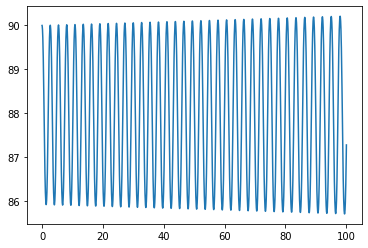

In [82]:
t = phi_t['t']
phi = phi_t['phi']

plt.plot(t, phi)
plt.show()